## Setup

We'll use the mpg dataset and predict whether a car has automatic or manual transmission.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [2]:
mpg = pydataset.data('mpg')
mpg.trans = np.where(mpg.trans.str.startswith('auto'), 'auto', 'manual')

In [3]:
X, y = mpg[['displ', 'cyl', 'cty', 'hwy']], mpg.trans

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## `.cross_val_score`

In [5]:
clf = DecisionTreeClassifier(max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.6114285714285714

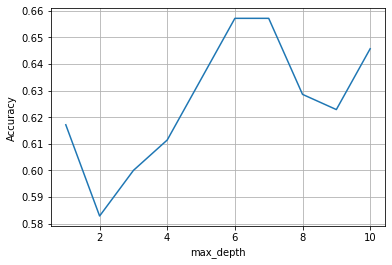

In [6]:
# TODO: loop through various depths and plot accuracy against depth

scores = {}

for depth in range(1,11):
    clf = DecisionTreeClassifier(max_depth=depth)
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    scores[depth] = score

    #print(f'{depth} | {score:.3f}')
    
pd.Series(scores).plot()
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.grid()

In [7]:
# TODO: use a metric other than accuracy

from sklearn.metrics import precision_score, make_scorer

clf = DecisionTreeClassifier(max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5, scoring=make_scorer(precision_score, pos_label='manual')).mean()

0.46333333333333326

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


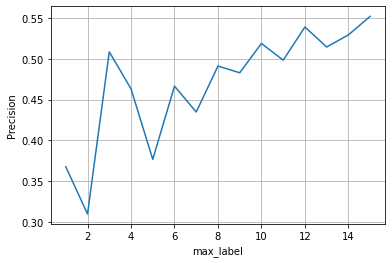

In [8]:
def evaluate_dtree(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    scorer_function = make_scorer(precision_score, pos_label='manual')
    return cross_val_score(clf, X_train, y_train, cv=5, scoring=scorer_function).mean()

pd.Series({depth: evaluate_dtree(depth) for depth in range(1,16)}).plot()
plt.ylabel('Precision')
plt.xlabel('max_label')
plt.grid()

## Grid Search

In [9]:
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, {'n_neighbors': range(1, 21)}, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [10]:
grid.cv_results_['mean_test_score']

array([0.59428571, 0.62857143, 0.60571429, 0.62857143, 0.61142857,
       0.61142857, 0.57142857, 0.62285714, 0.6       , 0.64      ,
       0.62285714, 0.65142857, 0.62857143, 0.62285714, 0.64      ,
       0.64      , 0.65142857, 0.63428571, 0.61714286, 0.64      ])

In [11]:
grid.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20}]

In [12]:
# TODO: look at the best score, params

grid.best_score_, grid.best_params_

(0.6514285714285715, {'n_neighbors': 12})

In [13]:
# TODO: get the best model

grid.best_estimator_

KNeighborsClassifier(n_neighbors=12)

In [14]:
#Properties of grid object

#Any python object has many attributes, either a function (method) or a value (dictionary, list, number) which we refer to as a property

In [15]:
clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, {'max_depth': range(1, 21), 'min_samples_leaf': range(1, 11)}, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 21),
                         'min_samples_leaf': range(1, 11)})

In [16]:
results = pd.DataFrame(grid.cv_results_['params'])

results['score'] = grid.cv_results_['mean_test_score']

In [17]:

results.sort_values(by='score').tail(30)


,max_depth,min_samples_leaf,score
30,4,1,0.639542
54,6,5,0.643791
41,5,2,0.643791
61,7,2,0.644118
101,11,2,0.644444
137,14,8,0.644771
197,20,8,0.644771
77,8,8,0.644771
187,19,8,0.644771
67,7,8,0.644771


In [18]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=13)

In [19]:
# For more fine-grained control over the results, use

#cross_validate(clf, )

In [20]:
clf = DecisionTreeClassifier(max_depth=12, min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [21]:
clf.score(X_test, y_test)

0.6949152542372882

## Exercise

1. Use the cross validation techniques described in the lesson to find the best model for predicting transmission type with the mpg dataset.

In [22]:
mpg = pydataset.data('mpg')
mpg.trans = np.where(mpg.trans.str.startswith('auto'), 'auto', 'manual')

In [23]:
X, y = mpg[['displ', 'cyl', 'cty', 'hwy']], mpg.trans

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [25]:
#Using Cross Valuation Score
clf = DecisionTreeClassifier(max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.6114285714285714

In [26]:
# Using Grid Search with KNN Classifier

clf = KNeighborsClassifier()
grid = GridSearchCV(clf, {'n_neighbors': range(1, 21)}, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [27]:

grid.best_score_, grid.best_params_

(0.6514285714285715, {'n_neighbors': 12})

In [28]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=12)

In [29]:
#Using Grid Search with Decision Tree Classifier

clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, {'max_depth': range(1, 21), 'min_samples_leaf': range(1, 11)}, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 21),
                         'min_samples_leaf': range(1, 11)})

In [30]:
results = pd.DataFrame(grid.cv_results_['params'])

results['score'] = grid.cv_results_['mean_test_score']

In [31]:
results.sort_values(by='score').tail(30)

,max_depth,min_samples_leaf,score
197,20,8,0.638889
67,7,8,0.638889
121,13,2,0.638889
107,11,8,0.638889
30,4,1,0.639542
41,5,2,0.643791
54,6,5,0.643791
101,11,2,0.644444
42,5,3,0.644444
157,16,8,0.644771


In [32]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=12)

### 2. Use cross validation techniques to determine the best model for predicting survival with the titanic dataset.

In [33]:
titanic = pydataset.data('titanic')

In [34]:
titanic.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


In [35]:
#Encode categorical variables to prep for modeling
from sklearn.preprocessing import LabelEncoder

for col in ['class', 'age', 'sex']:
    le = LabelEncoder().fit(titanic[col])
    titanic[col] = le.transform(titanic[col])

In [36]:
X, y = titanic[['class', 'age', 'sex']], titanic.survived

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [38]:
X_train.head()

,class,age,sex
699,2,0,0
784,2,0,0
103,0,0,0
1231,2,0,1
1025,2,0,0


In [39]:
#Using Cross Valuation Score
clf = DecisionTreeClassifier(max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7963595344306005

In [40]:
# Using Grid Search with KNN Classifier

clf = KNeighborsClassifier()
grid = GridSearchCV(clf, {'n_neighbors': range(1, 21)}, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [41]:
grid.best_score_, grid.best_params_

(0.7983951186996874, {'n_neighbors': 10})

In [42]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [43]:
#Using Grid Search with Decision Tree Classifier

clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, {'max_depth': range(1, 21), 'min_samples_leaf': range(1, 11)}, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 21),
                         'min_samples_leaf': range(1, 11)})

In [44]:
results = pd.DataFrame(grid.cv_results_['params'])

results['score'] = grid.cv_results_['mean_test_score']

In [45]:
results.sort_values(by='score').tail(30)

,max_depth,min_samples_leaf,score
94,10,5,0.797341
33,4,4,0.797341
92,10,3,0.797341
32,4,3,0.797341
121,13,2,0.797341
144,15,5,0.797341
143,15,4,0.797341
142,15,3,0.797341
141,15,2,0.797341
140,15,1,0.797341


In [46]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4)

### 3. Use cross validation techniques to determine the best model for predicting tip amount with the tips dataset.

In [47]:
tips = pydataset.data('tips')

In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
#Encode categorical variables to prep for modeling
from sklearn.preprocessing import LabelEncoder

for col in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder().fit(tips[col])
    tips[col] = le.transform(tips[col])

In [50]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,0,0,2,0,2
2,10.34,1.66,1,0,2,0,3
3,21.01,3.50,1,0,2,0,3
4,23.68,3.31,1,0,2,0,2
5,24.59,3.61,0,0,2,0,4


In [51]:
X, y = tips[['total_bill','sex','smoker','day', 'time','size']], tips.tip

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


In [53]:
X_train.head()

,total_bill,sex,smoker,day,time,size
55,25.56,1,0,2,0,4
161,21.50,1,0,2,0,4
142,34.30,1,0,3,1,6
73,26.86,0,1,1,0,2
144,27.05,0,0,3,1,6


In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 55 to 110
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  183 non-null    float64
 1   sex         183 non-null    int64  
 2   smoker      183 non-null    int64  
 3   day         183 non-null    int64  
 4   time        183 non-null    int64  
 5   size        183 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 10.0 KB


In [62]:
#Using Cross Valuation Score
lm = LinearRegression(normalize=True)
cross_val_score(lm, X_train, y_train, cv=5).mean()

0.3015575144290499

In [71]:
# Using Grid Search with OLS Classifier

clf = LinearRegression()

grid = GridSearchCV(clf, param_grid=parameters, cv=5)
grid.fit(X_train, y_train)

ValueError: Invalid parameter solver for estimator LinearRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

In [70]:
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__copy_X', 'estimator__fit_intercept', 'estimator__n_jobs', 'estimator__normalize', 'estimator__positive', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])